# Lab 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Question 2
Interpolate same speech signal used in Question 1 to generate its over-sampled version, and use
it to obtain a delta modulated speech signal. Calculate the SNR for the signal reconstructed from this delta modulated signal, and plot the SNR as

a) A function of the interpolation factor.

b) A function of the step size.

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
rate, data = wavfile.read('./output5.wav')
len(data), rate

(40000, 8000)

In [ ]:
data

array([[ 0.0000000e+00,  0.0000000e+00],
       [-3.0517578e-05,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00],
       ...,
       [-1.8859863e-02, -1.8859863e-02],
       [-2.0477295e-02, -2.0446777e-02],
       [-1.9226074e-02, -1.9226074e-02]], dtype=float32)

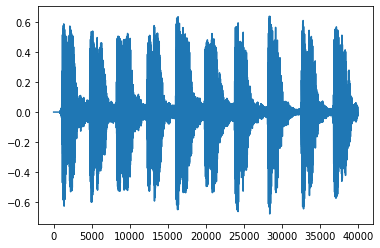

In [ ]:
data=data[:,0]
plt.plot(data)

In [ ]:
lx=len(data)
def sign(a):
    if a>=0:
        return 1
    else:
        return -1

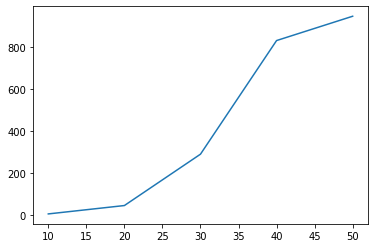

In [ ]:
#---------------------------------------------------(a)------------------------------------------------------------
larr=[10,20,30,40,50]
sqnr=[]
for l in larr:
    x=[];
    #Linear Interpolation with factor=l
    x.append(data[0])
    for i in range(1,lx):
        base=data[i-1]
        tmp=(data[i]-data[i-1])/l
        for j in range(1,l):
            x.append(base+j*tmp)
        x.append(data[i])

    #delta modulation
    d=0.001*8
    e=[]
    eq=[]
    xq=[]
    for i in range(0,len(x)):
        if i==0:
            e.append(x[i])
            eq.append(d*sign(e[i]))
            xq.append(eq[i])
        else:
            e.append(x[i]-xq[i-1])
            eq.append(d*sign(e[i]))
            xq.append(eq[i]+xq[i-1])
    #SQNR
    err=[]
    qn=0
    for i in range(0,len(x)):
        err.append(x[i]-xq[i])
        qn+=err[i]*err[i]
    s=0
    for i in range(0,len(x)):
        s+=xq[i]*xq[i]
    sqnr.append(s/qn)
plt.plot(larr,sqnr)

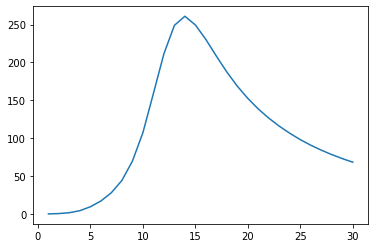

In [ ]:
#------------------------------------------------------(b)-----------------------------------------------------------
darr=np.arange(1,31)
sqnr=[]
x=[];
l=20

#Linear Interpolation with factor=l
x.append(data[0])
for i in range(1,lx):
    base=data[i-1]
    tmp=(data[i]-data[i-1])/l
    for j in range(1,l):
        x.append(base+j*tmp)
    x.append(data[i])

for k in darr:
    #delta modulation
    d=0.001*k
    e=[]
    eq=[]
    xq=[]
    for i in range(0,len(x)):
        if i==0:
            e.append(x[i])
            eq.append(d*sign(e[i]))
            xq.append(eq[i])
        else:
            e.append(x[i]-xq[i-1])
            eq.append(d*sign(e[i]))
            xq.append(eq[i]+xq[i-1])
    #SQNR
    err=[]
    qn=0
    for i in range(0,len(x)):
        err.append(x[i]-xq[i])
        qn+=err[i]*err[i]
    s=0
    for i in range(0,len(x)):
        s+=xq[i]*xq[i]
    sqnr.append(s/qn)
plt.plot(darr,sqnr)

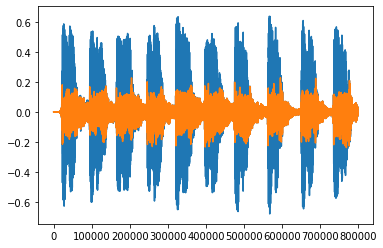

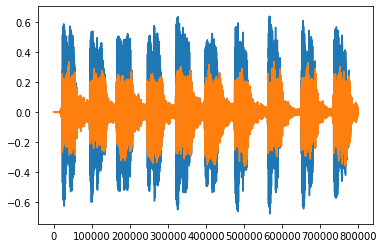

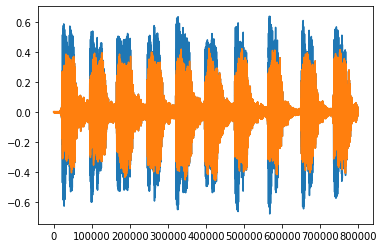

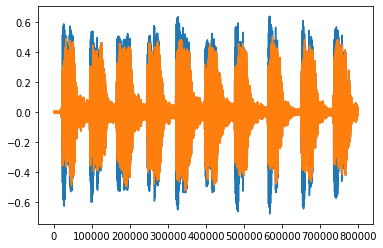

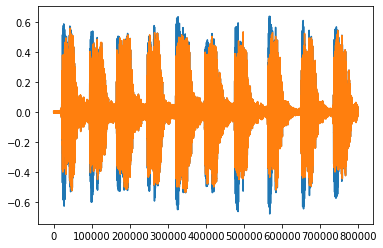

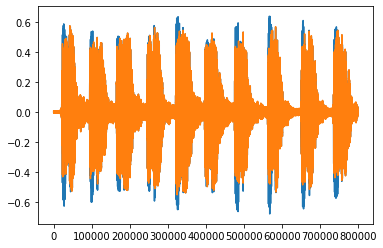

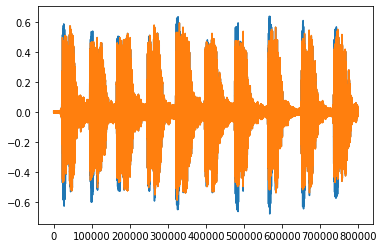

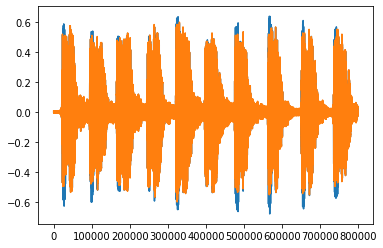

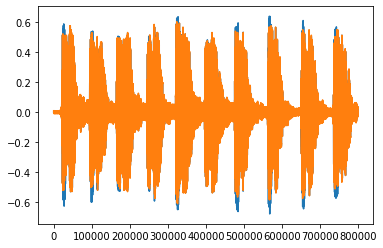

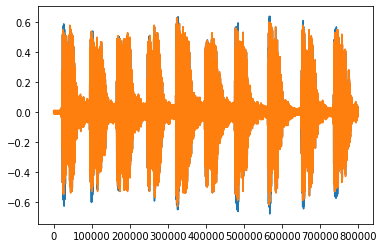

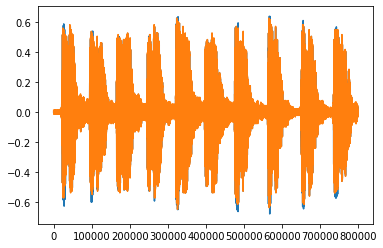

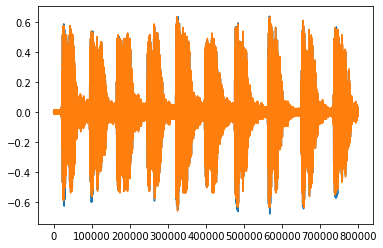

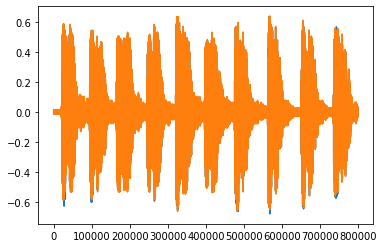

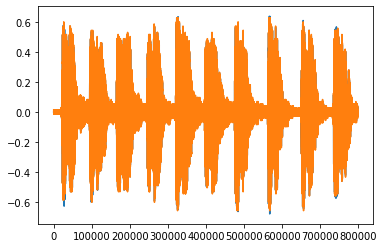

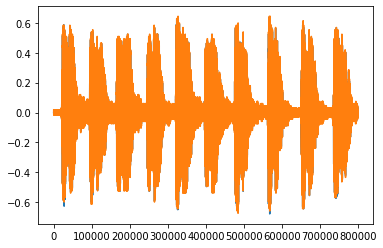

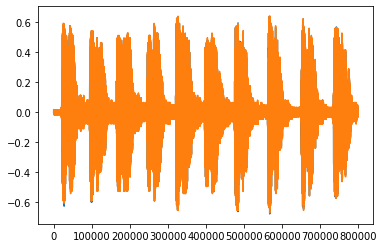

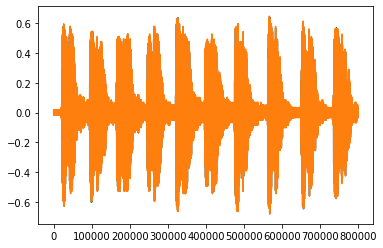

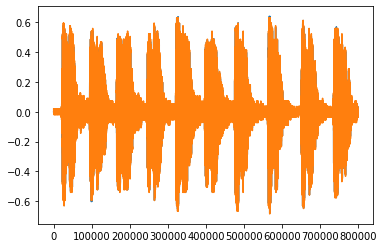

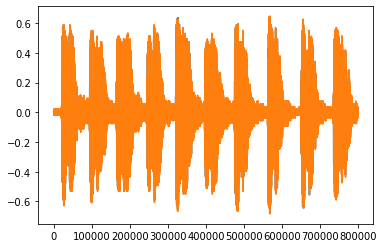

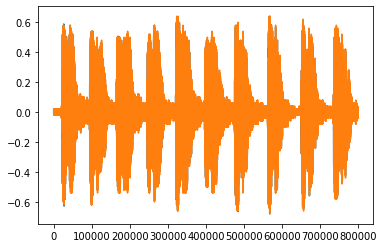

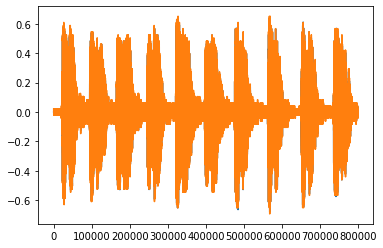

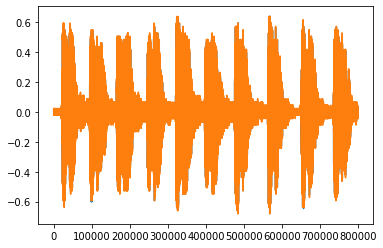

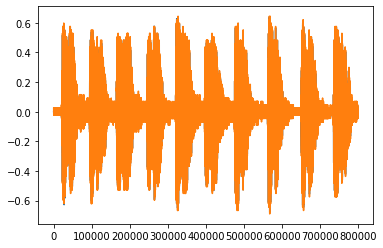

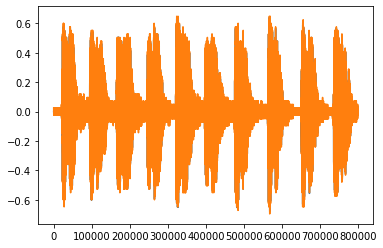

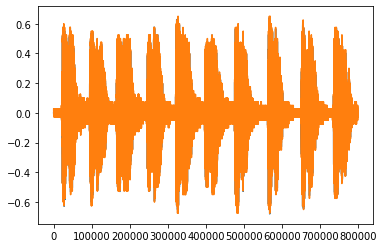

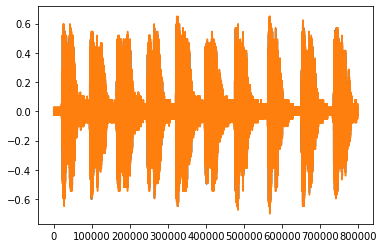

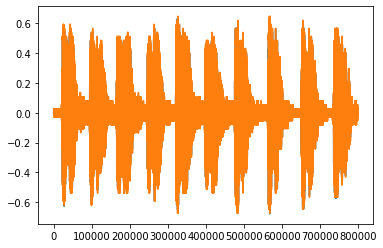

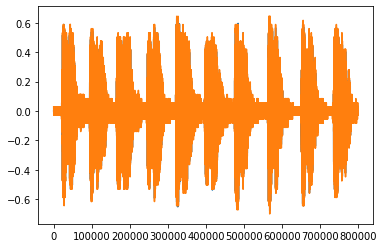

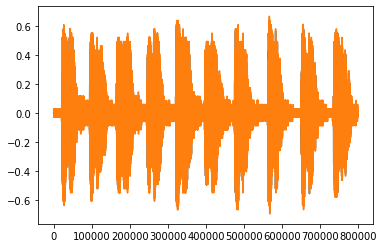

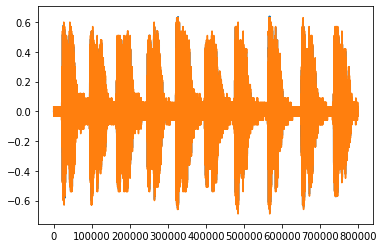

In [ ]:
#------------------------------------------------------(b)-----------------------------------------------------------
darr=np.arange(1,31)
sqnr=[]
x=[];
l=20

#Linear Interpolation with factor=l
x.append(data[0])
for i in range(1,lx):
    base=data[i-1]
    tmp=(data[i]-data[i-1])/l
    for j in range(1,l):
        x.append(base+j*tmp)
    x.append(data[i])

for k in darr:
    #delta modulation
    d=0.001*k
    e=[]
    eq=[]
    xq=[]
    for i in range(0,len(x)):
        if i==0:
            e.append(x[i])
            eq.append(d*sign(e[i]))
            xq.append(eq[i])
        else:
            e.append(x[i]-xq[i-1])
            eq.append(d*sign(e[i]))
            xq.append(eq[i]+xq[i-1])

    plt.plot(x)
    plt.plot(xq)
    plt.show()        
    #SQNR
    err=[]
    qn=0
    for i in range(0,len(x)):
        err.append(x[i]-xq[i])
        qn+=err[i]*err[i]
    s=0
    for i in range(0,len(x)):
        s+=xq[i]*xq[i]
    sqnr.append(s/qn)